In [93]:
import os
import shutil

# Define the source and destination directories
source_dir = '/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper'
dest_dir = '/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Re110/'

# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# List of files to be renamed and moved
files_to_move = ['grad1_x12.csv','grad1_x14.csv', 'grad1_x16.csv','grad1_x18.csv','grad1_x20.csv']

# Rename and move files
for file_name in files_to_move:
    # Define the source and destination file paths
    source_file = os.path.join(source_dir, file_name)
    dest_file = os.path.join(dest_dir, file_name.replace('grad1', 'grad2'))
    
    # Move and rename the file
    shutil.move(source_file, dest_file)
    print(f'Moved and renamed file: {source_file} to {dest_file}')


Moved and renamed file: /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/grad1_x12.csv to /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Re110/grad2_x12.csv
Moved and renamed file: /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/grad1_x14.csv to /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Re110/grad2_x14.csv
Moved and renamed file: /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/grad1_x16.csv to /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Re110/grad2_x16.csv
Moved and renamed file: /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/grad1_x18.csv to /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Re110/grad2_x18.csv
Moved and renamed file: /home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/grad1_x20.csv to /home/campus.ncl.ac.uk/nll93/Documents/code_satur

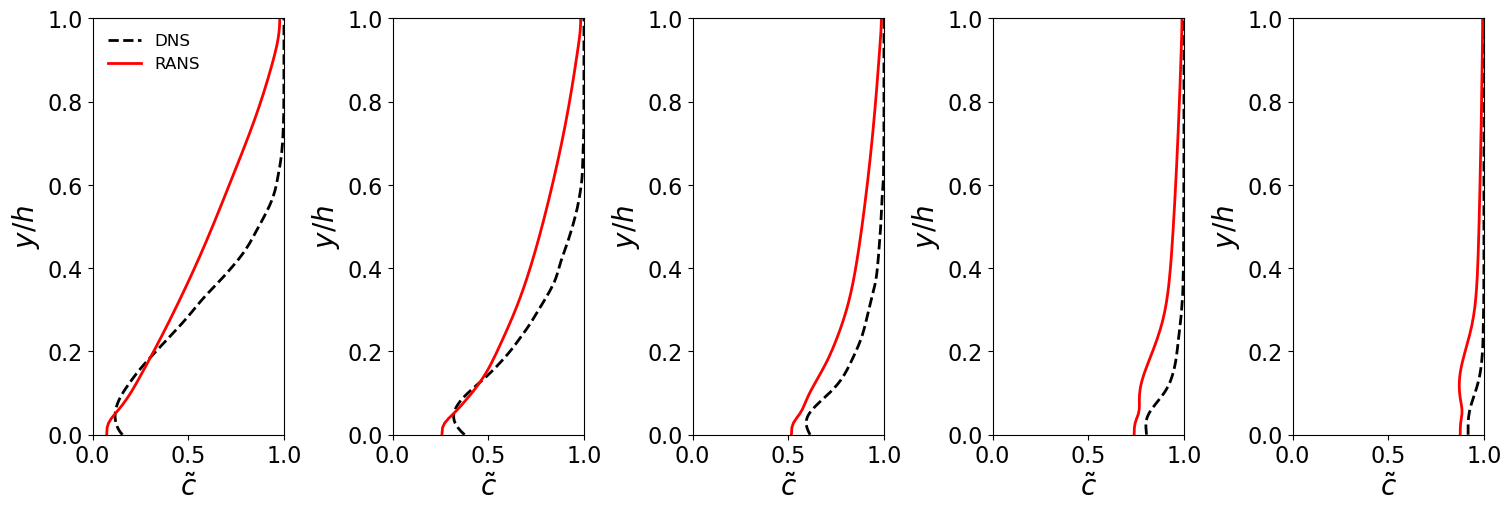

Saved figure: RPV_comparison.png


<Figure size 640x480 with 0 Axes>

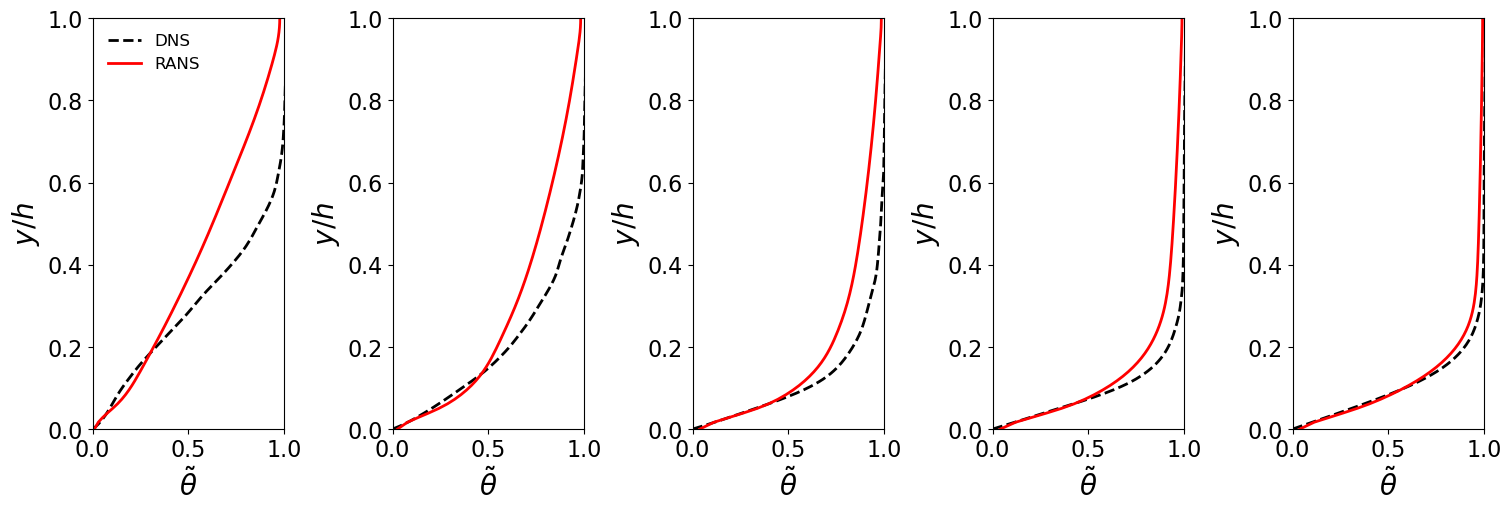

Saved figure: Theta_comparison.png


<Figure size 640x480 with 0 Axes>

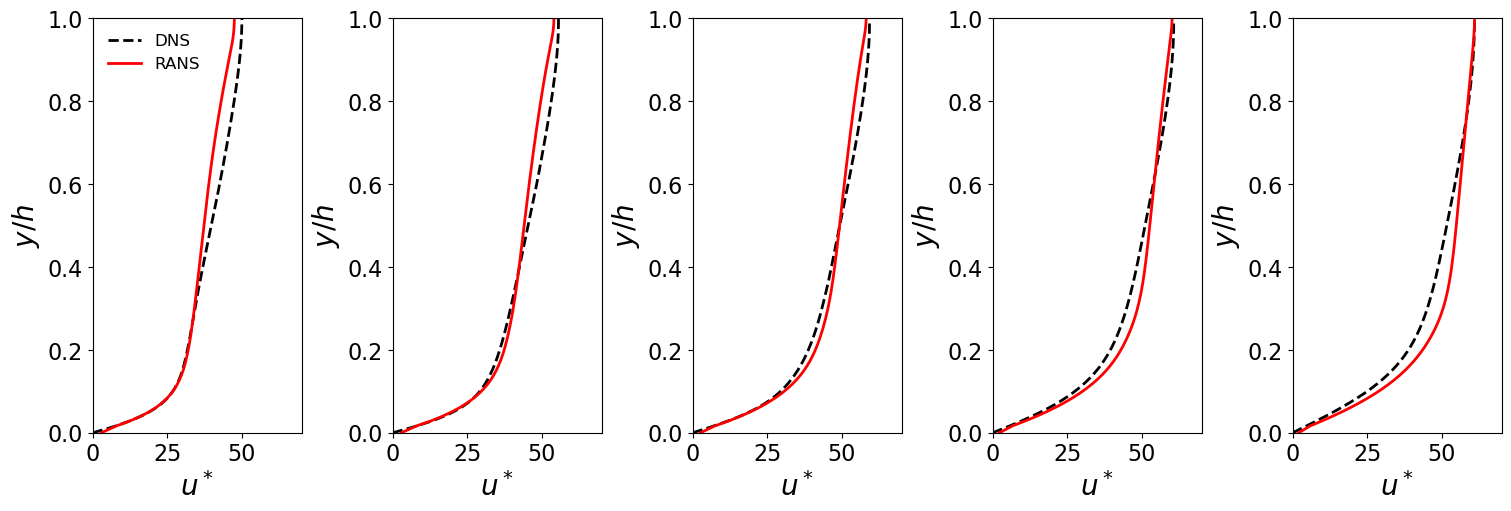

Saved figure: Velocity:0_comparison.png


<Figure size 640x480 with 0 Axes>

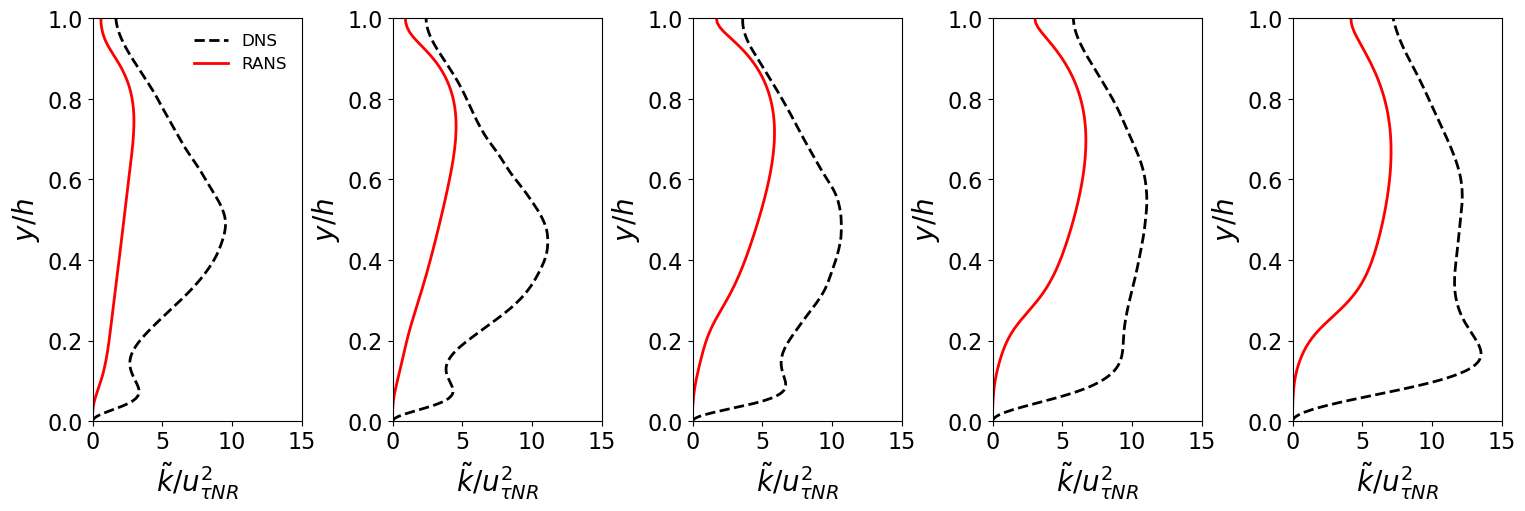

Saved figure: k_comparison.png


<Figure size 640x480 with 0 Axes>

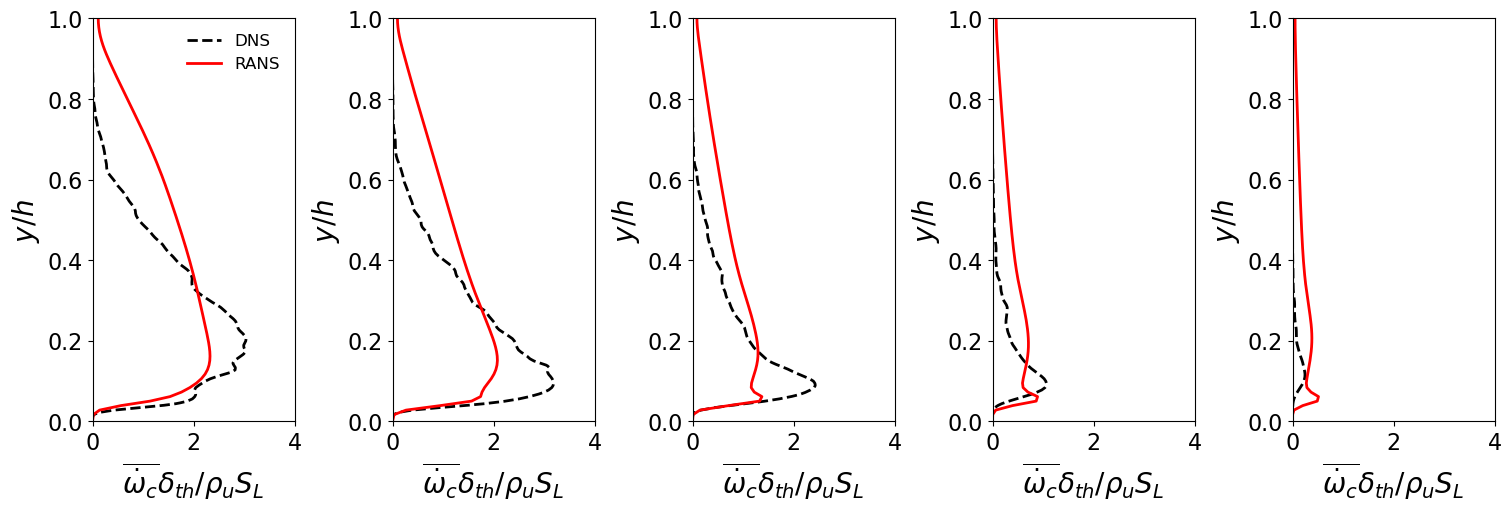

Saved figure: source_term_comparison.png


<Figure size 640x480 with 0 Axes>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the x/h locations and corresponding variables
x_h_locations = [12, 14, 16, 18, 20]
variables_to_plot = ['RPV', 'Theta', 'Velocity:0', 'k', 'source_term']
dns_variables = ['cf', 'tf', 'uf', 'ke', 'reac']  # Corresponding DNS variables

# Mapping for DNS variables
variable_mapping = {
    'RPV': 'cf',
    'Theta': 'tf',
    'Velocity:0': 'uf',
    'k': 'ke',
    'source_term': 'reac'
}

# X-axis limits for each variable
x_limits = {
    'RPV': [0, 1],
    'Theta': [0, 1],
    'Velocity:0': [0, 70],
    'k': [0, 15],
    'source_term': [0, 4]
}

# X-axis labels for each variable
x_labels = {
    'RPV': r'$\tilde{c}$',
    'Theta': r'$\tilde{\theta}$',
    'Velocity:0': r'$u^*$',
    'k': r'$\tilde{k}/u_{\tau NR}^2$',
    'source_term': r'$\overline{\dot{\omega}_c}\delta_{th}/\rho_u S_L$'
}

# Loop through each variable and create a separate figure
for variable in variables_to_plot:
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), constrained_layout=True)
    
    for i, x_h in enumerate(x_h_locations):
        ax = axes[i]
        
        # Plot DNS data
        dns_filepath = f'/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Re110/DNS_x{x_h}.csv'
        dns_data = pd.read_csv(dns_filepath)
        
        # Modify 'reac' to '-reac' in the DNS data
        if variable_mapping[variable] == 'reac':
            dns_data['reac'] = -dns_data['reac']
        
        # Plot grad data
        grad_filepath = f'/home/campus.ncl.ac.uk/nll93/Documents/code_saturne_simulations/SDR_paper/Re110/grad2_x{x_h}.csv'
        grad_data = pd.read_csv(grad_filepath)
        
        ax.plot(dns_data[variable_mapping[variable]], dns_data['Points:1'], label='DNS', color='black', linewidth=2, linestyle='--')
        ax.plot(grad_data[variable], grad_data['Points:1'], label='RANS', color='red', linewidth=2)
        
        # Set labels and limits
        ax.set_xlabel(x_labels[variable], fontsize=20)
        ax.set_ylabel(r'$y/h$', fontsize=20)
        ax.set_xlim(x_limits[variable])
        ax.set_ylim([0, 1])
        ax.grid(False)
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        if i == 0:  # Add legend to the first subplot of each figure
            legend = ax.legend(fontsize=12)
            legend.get_frame().set_linewidth(0)  # Remove the box around the legend
    
    # Show the plot for the current variable
    plt.show()


    # Save the plot for the current variable
    plt.savefig(f'{variable}_comparison.png', bbox_inches='tight')
    plt.close(fig)  # Close the figure after saving to free up memory
    print(f'Saved figure: {variable}_comparison.png')

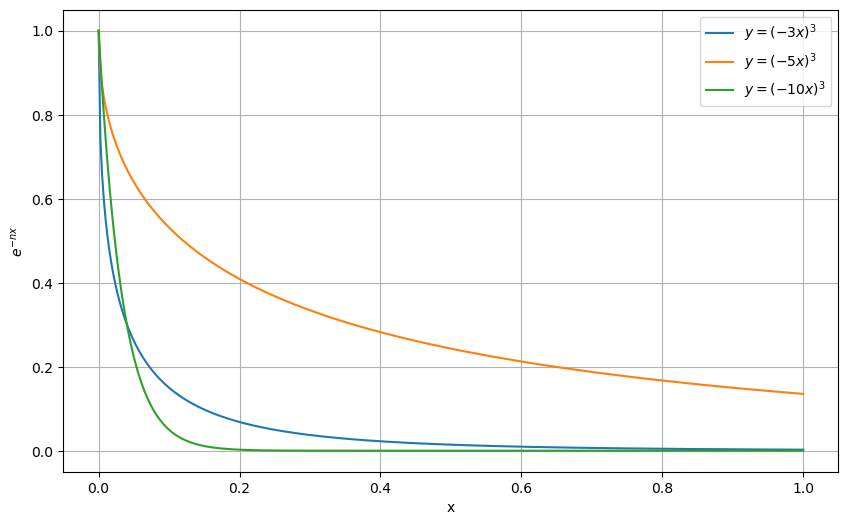

In [90]:
# Define the range
x = np.linspace(0, 1, 400)

# Define the function e^(-x)
y1 = np.exp(-2.0*x**0.5)**3.0
y2 = np.exp(-2.0*x**0.5)**1.0
y3 = np.exp(-10*x)**3.0
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label=r'$y=(-3x)^3$')
plt.plot(x, y2, label=r'$y=(-5x)^3$')
plt.plot(x, y3, label=r'$y=(-10x)^3$')
# Add title and labels
#plt.title(r'Plot of $e^{-x}$ from $0$ to $1$')
plt.xlabel('x')
plt.ylabel(r'$e^{-nx}$')
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()



In [20]:
np.exp(-0.25)**3

0.47236655274101474

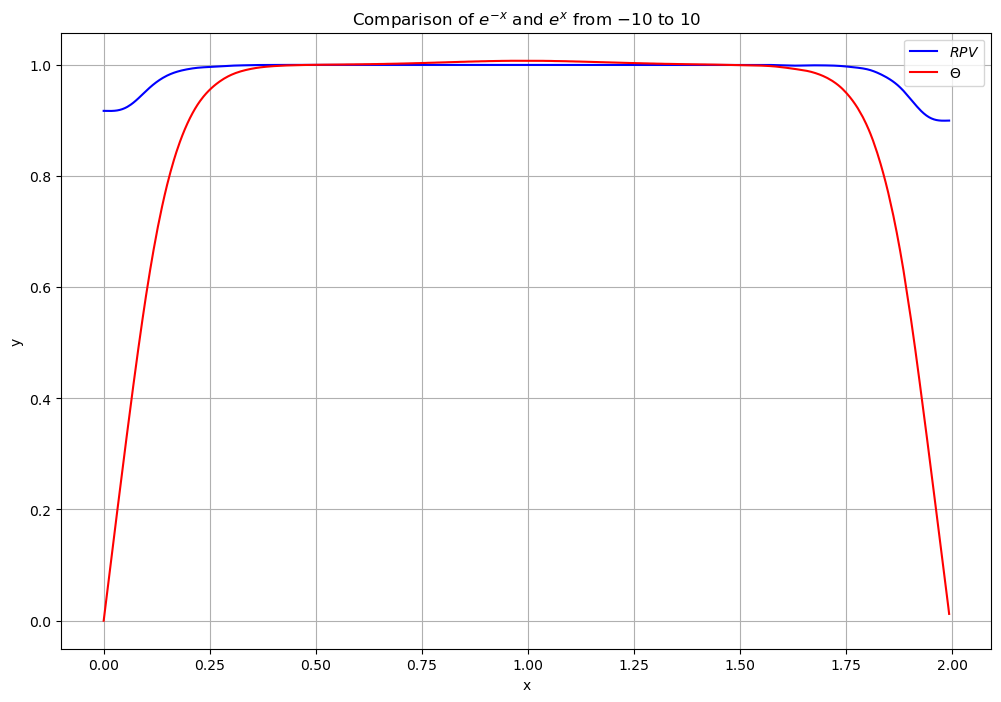

In [96]:

# Define the range
x = dns_data['Points:1']

# Define the functions
y1 = dns_data['cf']
y2 = dns_data['tf']

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the first function
plt.plot(x, y1, label=r'$RPV$', color='blue')

# Plot the second function
plt.plot(x, y2, label=r'$\Theta$', color='red')

# Add title and labels
plt.title('Comparison of $e^{-x}$ and $e^{x}$ from $-10$ to $10$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()


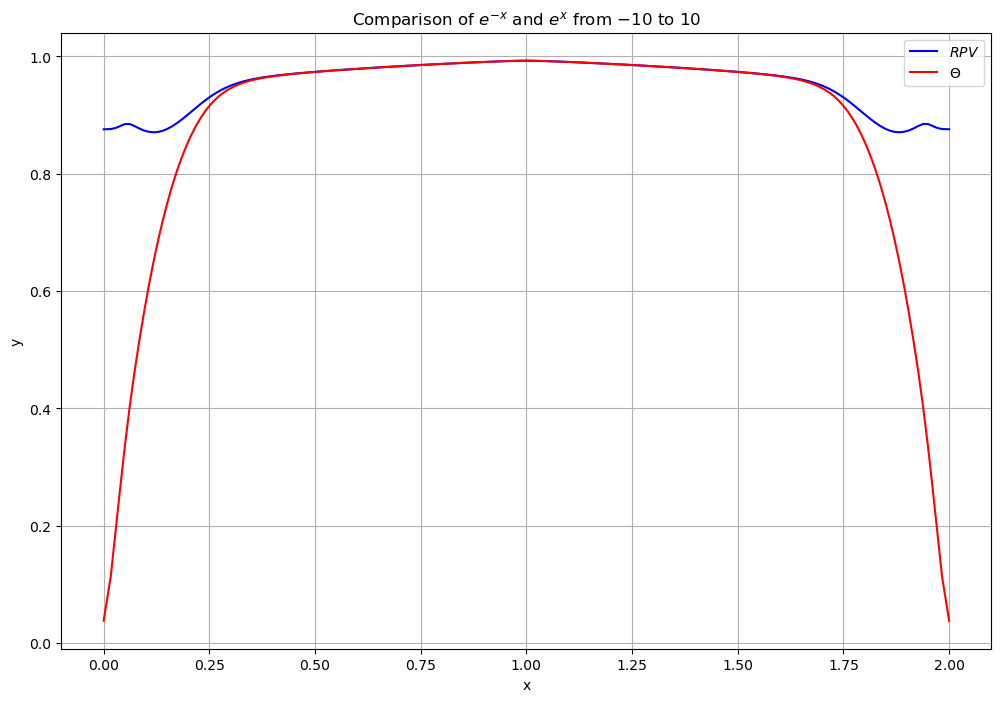

In [97]:

# Define the range
x = grad_data['Points:1']

# Define the functions
y1 = grad_data['RPV']
y2 = grad_data['Theta']

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the first function
plt.plot(x, y1, label=r'$RPV$', color='blue')

# Plot the second function
plt.plot(x, y2, label=r'$\Theta$', color='red')

# Add title and labels
plt.title('Comparison of $e^{-x}$ and $e^{x}$ from $-10$ to $10$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()